<a href="https://colab.research.google.com/github/jaiwin14/Synapse_LP/blob/week-2/SynapseWeekTwo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Synapse Week Two**

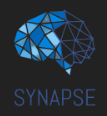

Last week, we dealt with the visualization and analytical aspect of ML. This week, lets directly get our hands dirty with various ML models.

Possibly the first question one must ask is, what is Machine Learning essentially made up of? In a broad sense, ML problems can be split into Supervised and Unsupervised learning. In supervised learning are the categories of Classification and Regression, which is what we'll explore today.

Like last time, resources and comments are provided above each cell, so peruse the resources and then get coding. Enough chitchat, lets get to work :P

Supervised vs Unsupervised vs Reinforcement Learning:

https://www.simplilearn.com/tutorials/machine-learning-tutorial/types-of-machine-learning

Regression vs Classification :

https://www.analyticsvidhya.com/blog/2023/05/regression-vs-classification/ (Might be a little wordy)

https://www.youtube.com/watch?v=1NBwM5tavTk&ab_channel=IntuitiveML
(A very quick video)

Machine Learning for Everyone (Read till 1.1):

https://vas3k.com/blog/machine_learning/

OPTIONAL BUT USEFUL <br>
Overfitting and Underfitting [VERY IMPORTANT]
https://www.youtube.com/watch?v=T9NtOa-IITo

Lets import all the basic libraries.

In [ ]:
!pip install shap -q  #Will be used later on

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Mount your Google Drive using the cell below.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Regression

For regression, lets reuse the crab dataset that you worked on last week. Import the dataset from wherever you had saved it in the cell below.
Also print the first 5 rows to ensure you have loaded the dataset correctly.

In [ ]:
df_crab = pd.read_csv('/content/train.csv')
df_crab.head()


,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [ ]:
df_crab.shape

(74051, 10)

Now, let's some employ some Feature Engineering tactics which you would have performed in the previous tasks.

Create a function called crab_processing which takes a dataframe as an input, performs the following tasks, and returns a cleaned and edited df:

1) Drop the 'id' column.

2) Drop all rows where 'Height' of the crab is 0.

3) Create a new column called 'LostWeight' which is calculated using the following formula - ```
Weight - (Shucked + Viscera + Shell)``` .
If this formula gives a number less than 0, then assign 0 to the LostWeight column, else assign 1.

4) Finally, use one hot encoding to encode the column 'Sex'

Take help from your previous task where you have implemented these steps in different cells.


In [ ]:
# Your code starts here
def crab_processing(df):
  #logic for feature engineering
  df.drop('id',axis=1,inplace=True)
  df = df[df.Height != 0]
  #df.drop("Lost Weight",axis=1,inplace=True)
  df['Lost Weight']=df['Weight']-(df['Shucked Weight']+df['Viscera Weight']+df['Shell Weight'])
  df['Lost Weight'] = df['Lost Weight'].apply(lambda x: 0 if x <= 0 else 1)
  add = pd.get_dummies(df['Sex'],prefix='Sex',dummy_na=False,dtype='float64',)
  df = pd.concat([df, add], axis=1)
  df.drop('Sex', axis=1,inplace=True)
  return df

df_crab = crab_processing(df_crab)
df_crab.head()
# Your code ends here

<ipython-input-6-b1d851221bd8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lost Weight']=df['Weight']-(df['Shucked Weight']+df['Viscera Weight']+df['Shell Weight'])
<ipython-input-6-b1d851221bd8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lost Weight'] = df['Lost Weight'].apply(lambda x: 0 if x <= 0 else 1)


,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Lost Weight,Sex_F,Sex_I,Sex_M
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,1,0.0,1.0,0.0
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,1,0.0,1.0,0.0
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,1,0.0,0.0,1.0
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,1,1.0,0.0,0.0
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,1,0.0,1.0,0.0


If all is correct, this should be the shape of your df now.

In [ ]:
df_crab.shape

(74027, 12)

###Basic Visualization

In this problem, our aim is to predict the age of the crab, hence 'Age' here is called our target variable. To check its distribution, plot a histogram of the 'Age' column.

Choose the number of bins by experimenting. The output is expected to mimic a bell curve.

What is a histogram? - https://www.w3schools.com/python/matplotlib_histograms.asp

Difference between histogram and a bar graph - https://keydifferences.com/difference-between-histogram-and-bar-graph.html

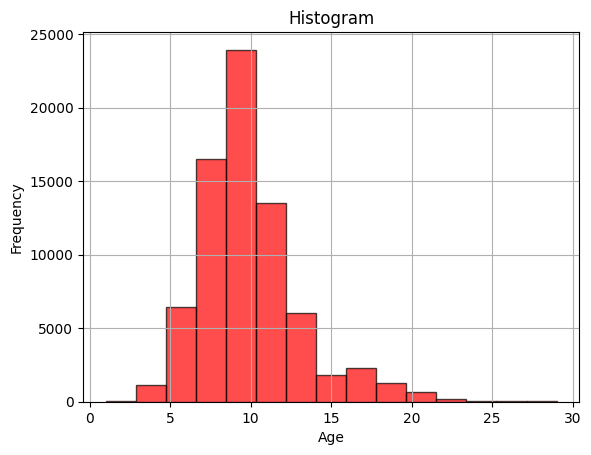

In [ ]:
# Your code starts here
plt.hist(df_crab['Age'],bins=15, color='red', edgecolor='black', alpha=0.7)


plt.title('Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
# Your code ends here

###Feature and Variable Sets

As mentioned above, the 'Age' column is what we're gonna be predicting. So essentially we need to create two additional dataframes, one which contains all the training features (All columns except 'Age') and one which only contains the column 'Age'. Name them X and y respectively.

In [ ]:
print(df_crab.columns)

Index(['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age', 'Lost Weight', 'Sex_F',
       'Sex_I', 'Sex_M'],
      dtype='object')


In [ ]:
# Your code starts here
#X = df_crab[['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
  #     'Viscera Weight', 'Shell Weight', 'Lost Weight', 'Sex_F',
   #    'Sex_I', 'Sex_M']]
#y = df_crab[['Age']]
y=pd.DataFrame({'Age': df_crab['Age']})
X=df_crab.drop(columns=['Age'])
# Your code ends here

In [ ]:
# This code should print (74027, 11) and (74027, 1) if everything is correct
print(X.shape,y.shape)

(74027, 11) (74027, 1)


In [ ]:
#Print a few records of X
X.head()
#Indexing kar sakte hai {print(X[2:7])}
#Filter kar sakte hai

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Lost Weight,Sex_F,Sex_I,Sex_M
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,1,0.0,1.0,0.0
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,1,0.0,1.0,0.0
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,1,0.0,0.0,1.0
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,1,1.0,0.0,0.0
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,1,0.0,1.0,0.0


In [ ]:
X.tail()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Lost Weight,Sex_F,Sex_I,Sex_M
74046,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,1,1.0,0.0,0.0
74047,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,1,0.0,1.0,0.0
74048,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,1,1.0,0.0,0.0
74049,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774,1,0.0,1.0,0.0
74050,0.9125,0.6750,0.2000,5.386405,2.055339,1.034757,1.700970,1,0.0,1.0,0.0


In [ ]:
#Print a few records of y
y.head()

,Age
0,9
1,8
2,9
3,11
4,8


In [ ]:
y.tail()

,Age
74046,10
74047,6
74048,10
74049,8
74050,6


###Train-Test Split

Implementation - https://www.youtube.com/watch?v=BUkqYGPnLZ8&ab_channel=ManifoldAILearning

Now, while we need data to train our regression model, it is equally important to keep some data aside for testing the effectiveness of the aforementioned model. Thus the dataset as a whole is generally further divided into the training dataset and the testing dataset.

In order to implement this, import train_test_split function from scikit-learn.

In [ ]:
# Import train_test_split Hint: Use sklearn.model_selection
from sklearn.model_selection import train_test_split


**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**

They should be called X_train, X_test, y_train, y_test

In [ ]:
# Your code starts here
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3, random_state=42)
# Your code ends here

Print the size and shape of each of the train/test splits (it should be in the ratio as per test_size parameter above, i.e in ratio of 0.3)

In [ ]:
# Your code starts here
print(X_train.size)
print(X_test.size)
print(y_train.size)
print(y_test.size)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# Your code ends here

569998
244299
51818
22209
(51818, 11)
(22209, 11)
(51818, 1)
(22209, 1)


Can you see that the data has been divided into 2 datasets of size 70% and 30% of the original dataset each? Use your calculator to confirm this :)

###Model fit and training

Here is the complete lowdown on SVM (Support Vector Machine):<br>
Theory : https://youtu.be/H9yACitf-KM <br>
Theory: https://www.analyticsvidhya.com/blog/2021/06/support-vector-machine-better-understanding/ <br>
Implementation : https://youtu.be/FB5EdxAGxQg

Import SVR (Support Vector Regressor) and its metrics from scikit-learn.

In [ ]:
# Add your import statement here
# High regularization,high gamma --> Tedha Medha alomst overfitting
# Low regularization,low gamma --> Sidha but thode errors
from sklearn.svm import SVR
svr = SVR()
# Create an SVR object 'svr' by calling SVR()


Fit the model on to the instantiated object itself using the X_train and y_train created earlier. No need to create another variable.

Hint: svr.fit()

This might take about a minute or so, just to inform you.

In [ ]:
# Your code starts here
svr.fit(X_train,y_train)
# Your code ends here

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


###Prediction, error estimate, and regression evaluation matrices

**Prediction using the svr model**

The X_train and y_train dataframes have been used to train the model. Now we will use X_test and y_test to evaluate the efficiency of the model we have trained.

Use svr.predict() on X_test and store it in a variable called "predictions". Print type and size of the predictions.

Size should be (22009,) if everything is correct.

In [ ]:
# Your code starts here
predictions = svr.predict(X_test)
print(predictions.dtype)
print(predictions.size)
# Your code ends here

float64
22209


Now that we have our predictions, let's compare it with y_test and see how accurate our predictions are.

Plot a Scatter plot of predicted price and y_test set to see if the data falls on a 45 degree straight line

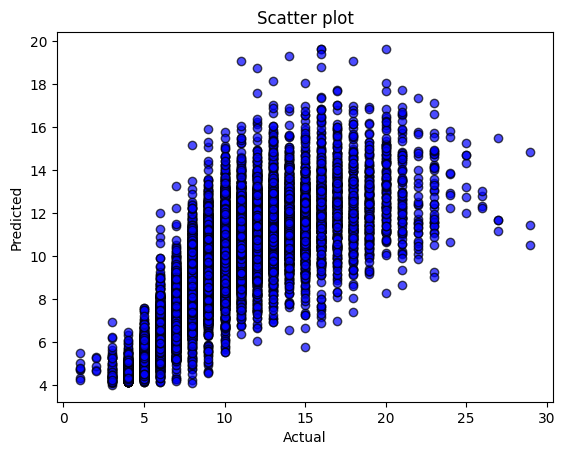

In [ ]:
# Your code starts here
#sns.scatterplot(y_test,y=predictions,color='r',sizes=[20,40],alpha=0.8,marker='o',edgecolor='black')
plt.scatter(y_test, predictions, color='blue', marker='o', edgecolor='black', alpha=0.7)
#plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='red')
#plt.scatter(predictions,y_test)

plt.title('Scatter plot')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
# Your code ends here

As you can see, it's not perfect, but you can definitely visualize the data lining up at a 45 degree angle.

**Model Evaluation**

We will be exploring the most common regression metric here namely R2 score. You can check out more metrics here: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Here's a video detailing all the popular regression metrics - https://www.youtube.com/watch?v=Ti7c-Hz7GSM

**Print the R-square value and round it to 3 decimal places**

Hint: sklearn metrics.r2_score

In [ ]:
# Your code starts here
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("R2",round( r2_score(y_test,predictions),3 ))
r2 = r2_score(y_test,predictions)
# Your code ends here

R2 0.551


In the cell below, explain what the above score means and also elaborate how 'good' is the score in terms of evaluation of the model

**Score means ki how much different is our regression line from The line passsing through the mean of the values.

Since our R2 score is 0.551 whuch is very poor, it seems we have used the wrong ML Model for our Dataset :(**



In [ ]:
#Explore additional metrics here
print("MAE",mean_absolute_error(y_test,predictions))
print("MSE",mean_squared_error(y_test,predictions))
print("RMSE",np.sqrt(mean_squared_error(y_test,predictions)))


MAE 1.3882824656961
MSE 4.4173806768081505
RMSE 2.10175656935054


You have succesfully implemented Support Vector Regressor to predict Age of a crab. But is this the only regression model out there? In the cell below, list down 3 more regression models with a basic explanation of how they work. Also include a line explaining in which scenario each model works best.

# Linear Regression:
 Linear regression is the most basic and widely used regression model. It assumes a linear relationship between the independent variables and the target variable. Basically y=mx+c waali line plot karke usse actual points ka distance check karta hai.
If distance <<, Accuracy>>.
Basically ek scatter plot create karo of the dependent variable and independent variable.
Agar it looks linear(along 45 degree) try applying Linear regression.

# Polynomial Regression:
It extends the concept of linear regression by allowing for curved relationships between variables.
Isme you have to select the degree and make sure overfitting naa ho.
Otherwise linear eq ke badle its a polynomial equation
Same tarah se scatter plot banao and non-linear relationship dikhe toh bass degree appropriately choose and apply.

#Bayes Regression:
Not going into iska complicated math(cuz padhte hue sir dukh gaya), it basically instead of using points it uses distribution curves which in turn improve the Accuracy.
When data is sparse ya limited, Bayesian for the W.

###OPTIONAL: Explainability

So you passed some data into a model, and trained it using that data. You then used some other data to test the accuracy of that model, and it now predicts values when you pass in some data. Ok. But how does it REALLY predict that value? How much is it relying on each individual feature column of data that you passed to the model? This is where the concept of explainability comes into picture, where you can understand for each data point, exactly what parameters led the model to predict the value that it has.

Info about explainable AI <br>
https://www.ibm.com/topics/explainable-ai <br>
About shap <br>
https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

In [ ]:
#Run this code as it is
from shap import KernelExplainer, force_plot, sample

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


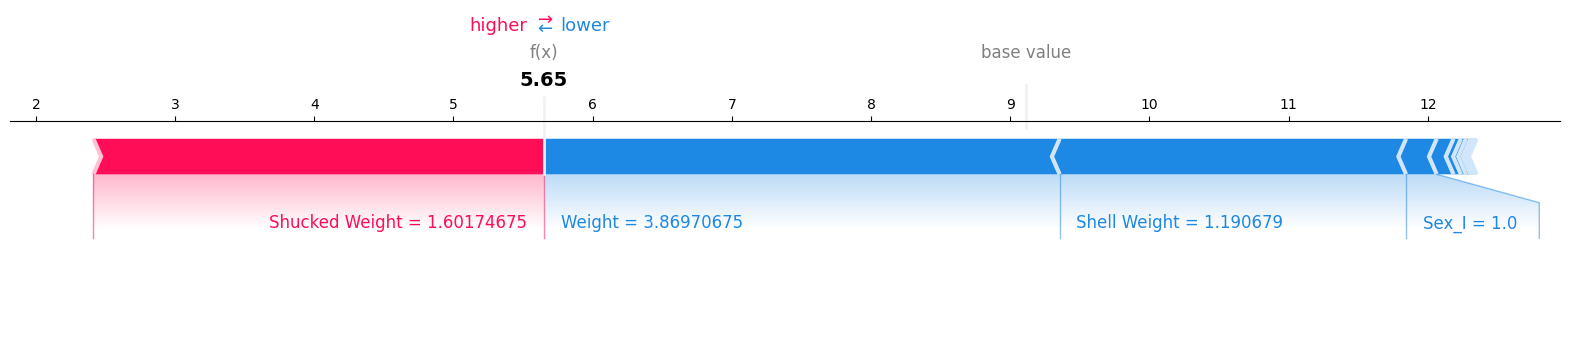

In [ ]:
#Run this code as it is
ex = KernelExplainer(svr.predict, sample(X_train, 10))  #only taking sample of 10 values for now
shap_values = ex.shap_values(X_test.iloc[0,:]) #explaining 1st tuple of the X_test dataframe
force_plot(ex.expected_value, shap_values, X_test.iloc[0,:], matplotlib=True)

Can you see how the above plot visualizes which parameters contributed significantly to the prediction, and what were the actual values which led to the prediction?

##Classification

In the below cells, we are going to implement K Nearest Neighbour Classification.

Link to the dataset is here - https://drive.google.com/file/d/1bVOfBJYUr0JtZ7pp1lcyNamnHHXn_fDm/view?usp=sharing <br>

Import the 'classified_data.txt' dataset using pandas and print the first five columns.

Use "index_col" parameter to index the dataframe according to the first column. Otherwise, a new column would get created. Call this new dataframe 'df'.

In [3]:
df = pd.read_csv('/content/classified_data.txt',index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


If you're wondering what these column names signify, well they are classified as the dataset name suggests. Our job here is to simply take the data at face value and build a model for classifying the target classes.

###Basic EDA

In the following two cells, use info() and describe() to get the data type and statistical summary of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [ ]:
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


**Run a 'for' loop to draw boxplots of all the features for '0' and '1' TARGET CLASS**<br>
Hint: Loop through each of the 10 features and draw a separate boxplot. You should have 10 boxplots in total. <br>
Refer seaborn boxplot() documentation

Here is some information about boxplots:

Understanding Boxplots:
https://medium.com/analytics-vidhya/introduction-to-box-plots-and-how-to-interpret-them-22464acbcba7 <br>
Comparing two boxplots: https://www.nagwa.com/en/explainers/812192146073/

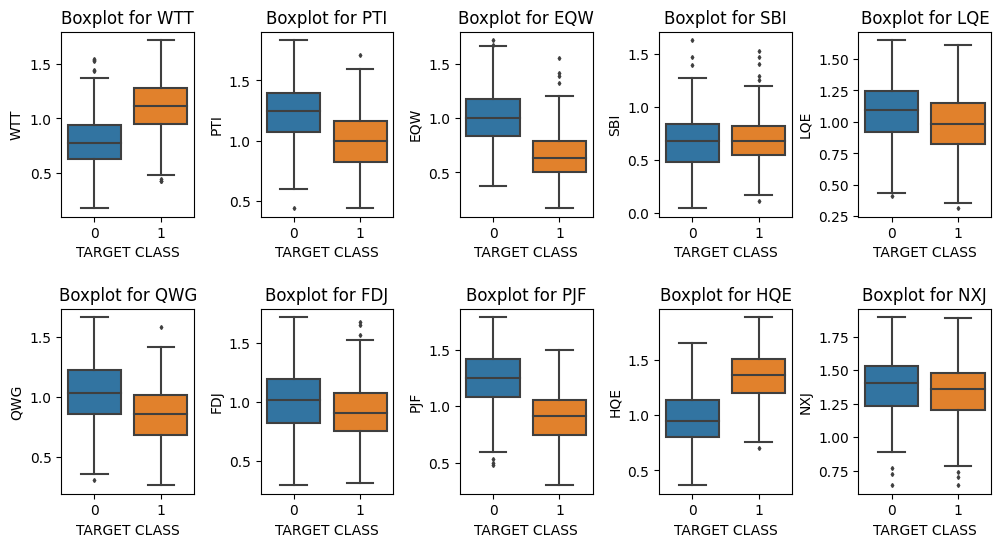

In [ ]:
# your code starts here
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
fig.subplots_adjust(hspace=0.5,wspace=0.5)
columns=df.drop(columns=['TARGET CLASS'])
for i, feature in enumerate(columns):
    row = i // 5
    col = i % 5
    sns.boxplot(x='TARGET CLASS', y=feature, data=df, ax=axes[row, col],width=0.8,fliersize=2)
    axes[row, col].set_title(f'Boxplot for {feature}')


# your code ends here

What conclusion, if any can you draw from these boxplots?
List them down below.

1) Boxplot for WTT has much more outliers for 0 Target Class than 1.     
2) Boxplot for PTI does not have medians passing through the other so not really useful for comparision.                                       
3) Boxplot for EQW has much more outliers for 1 Target Class than 0.      
4) Boxplot for SBI has both the medians in the same line but numerous outliers so I would recommend to use whis attribute and 1 Target Class is more preferable since it has lower IQR.                          
5) Boxplot for LQE is SUPERB :). (very kam outliers)                      
6) Boxplot for QWG mai 75% of TC 1 is lower than 50% of TC 0.
Also TC 0 has significant range.                                          
7) Boxplot for EQW has many outliers for 1 Target Class.                   
8) Boxplot for PJF mai 75% of TC 1 is lower than 25% of TC 0.
Also TC 0 has has many outliers.                                             
9) Boxplot for HQE mai 75% of TC 0 is lower than 25% of TC 1.            
10) Boxplot for NSJ mai Medians are synced but outliers>>. So use whis.

### Standardize the features using sklearn.preprocessing
Why should we standardize?<br>
Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardization is usually used prior to model fitting.<br><br>

To give you an example, values pertaining to Age usually lie within the range of 1-100, however values pertaining to Salary lie in a much wider range of say 10000-1000000. You can see how having both columns be a part of a classification model as is would lead to an imbalance in importance assigned to columns.
<br><br>
Go through this link for a better understanding:<br>
https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832

**import StandardScaler from Sklearn and instantiate it to a variable called "scaler"**

In [4]:
# your code starts here
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

# your code ends here

**Fit only the features data to this scaler (leaving the TARGET CLASS column out) and then transform**<br>
Hint: scaler.fit() and scaler.transform()

In [5]:
xyz=df[['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ']]
scaler.fit(xyz)
tp = scaler.transform(xyz)

**scaler.transform() will return an array. We need to convert this into a dataframe. Do this and add the column names to the dataframe. Call this new dataframe as "df_feat". Call head() on this df**<br>
Note: The final dataframe will have the initial columns except the "TARGET CLASS".

In [6]:
# your code starts here
df_feat = pd.DataFrame(tp,columns=['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ'])
df_feat
# your code ends here

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


### Train/Test split

**Set X to be equal to df_feat and set y accordingly. As you know, X contains our training features and y contains our target.**<br>
Hint: y can be taken directly from the initial dataframe "df"

In [7]:
# Your code starts here.
X=df_feat
y=df['TARGET CLASS']

# Your code ends here

**Import train_test_split function from scikit-learn**<br>
**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [8]:
# Your code starts here.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3, random_state=42)
# Your code ends here

### Model fit and training

Before moving ahead with the cells below, learn how the K Nearest Neighbour Algorithm actually works.

Theory and implementation : https://youtu.be/wTF6vzS9fy4 <br>
Theory: https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

**import KNeighborsClassifier from sklearn and initialize it with neighbours = 1 (more on this later) . Fit this on X_train and y_train**

In [9]:
# Your code starts here.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
# Your code ends here

KNeighborsClassifier(n_neighbors=1)

**Using this fitted model, predict on X_test. Store these predictions in variable called pred.**

In [10]:
# Your code starts here.
pred = knn.predict(X_test)
# Your code ends here

**Let us check how correct these predictions are.<br>
Print a classification report of y_test and pred**<br>
Hint: sklearn classification_report

In [11]:
# Your code starts here.
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))
# Your code ends here

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       142
           1       0.95      0.93      0.94       158

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



Learn all about classification metrics - https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-models-e2f0d8009d69

**Print the accuracy using numpy and round it to 3 decimal places.**

In [12]:
# Your code starts here.
from sklearn.metrics import accuracy_score
accuracy = np.mean(pred == y_test)
print(f'Accuracy: {accuracy:.3f}')
# Your code ends here

Accuracy: 0.937


Hey, not bad! But can we further improve this? Remember our arbitrary choice for n_neighbours? Can we improve that?

### Choosing optimal 'k'

**Above, we chose n_neighbours to be equal to 1. Choosing a small value of K leads to unstable decision boundaries. <br>
We need to select n_neighbours by calculating the accuracy for every value of n from 1 to 60 and then choosing the one which gives the highest accuracy.**

In [22]:
# Do the same as we did above, but this time make a loop from n = 1 to n = 60 and append the accuracy
# for each in a list
accuracies = []
n_neighbors_values = []
# Your code starts here.
for n in range(1,61):

    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    accuracy1 = np.mean(pred == y_test)
    accuracies.append(accuracy1)
    n_neighbors_values.append(n)

# Your code ends here

0.9533333333333334


**Plot a graph of K value vs Accuracy**

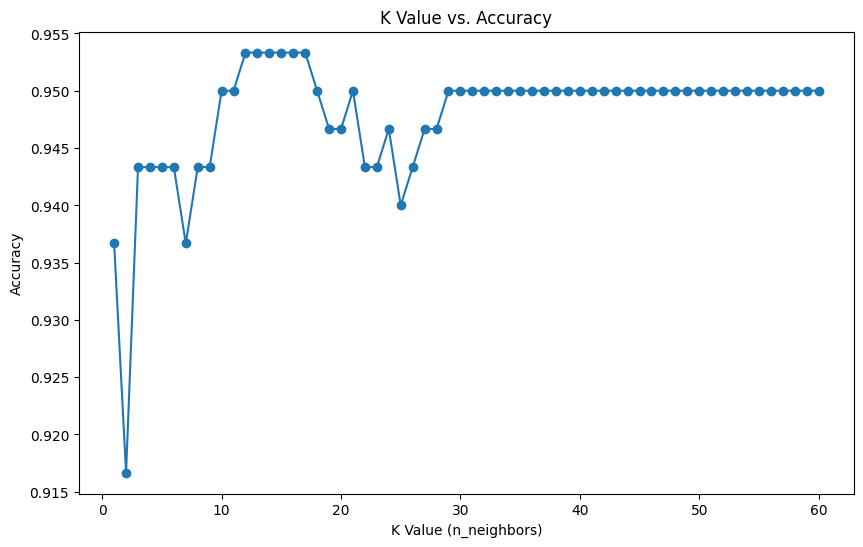

In [20]:
# Your code starts here.
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_values, accuracies, marker='o', linestyle='-')
plt.title('K Value vs. Accuracy')
plt.xlabel('K Value (n_neighbors)')
plt.ylabel('Accuracy')
plt.show();
# Your code ends here

**Choose the best value of n_neighbours and give a reason why and also print the accuracy**

In [33]:
best = []
for accuracy in accuracies:
        if accuracy == 0.9533333333333334:
            best.append(accuracies.index(accuracy) + 1)
best1 = set(best)


In [36]:
# Your code starts here.

n_acc_best = max(accuracies)
n_neigh_best = best1
print("Best value of n_neighbours: {}".format(n_neigh_best))
print("Corresponding highest accuracy: {}".format(n_acc_best))
# Your code ends here

Best value of n_neighbours: {12}
Corresponding highest accuracy: 0.9533333333333334


In [1]:
# Reasons:
#Since highest Accuracy is shown for 12 nearest neighbours it is selected

# **Bonus: To be done only if you have completed the above tasks.**


# Reinforcement learning
**Reinforcement learning is a machine learning training method based on rewarding desired behaviors and punishing undesired ones**               

---


 **How does it work?**

The main elements of an RL system are:
*   The agent or the learner
*  The environment the agent interacts with
*  The policy that the agent follows to take actions
*  The reward signal that the agent observes upon taking actions

Basically, Reinforcement Learning is similar to Good Parenting systems.
There the parents are the observers or the environment, the kid is the agent, reward is a toffee for instance and the punishment is taking away their phone.
If the kid completes its homework on time, the parents observe and reward it with a toffee. But if he/she, are not able to finish their work, parents take away their phone(Cuz obviously phone is source of all problems 😢).

Similarly if the kid completes his homework before time(more efficiently) he gets a bigger toffee.

This same principle is applied in Reinforcement Learning.


---

 **Applications Of RL:**

I will state only 3 applications to keep the blog crisp:

1) Maps which we use to Navigate use RL to find the best route possible out of multiple routes.

2) Websites like chess.com use RL for their AI to calculate and perform its next move based on the opponents piece positions.

3) We can use RL to keep on running Face Recognition on a Suspect till he/she is found and then reward the Algo.

ALPHA GO is another example where we beat the best using RL.

---
**Benefits of RL:**

1) Does not need a separate data collection step:
 Keeps learning from the environment.

2) Works in dynamic, uncertain environments

---
**Problems faced with RL:**

1) As the Environment is very extensive and ever growing, it ,might be difficult for the Algo to keep up with the complexity which may in turn affect the overall accuracy.

2) Short term rewards can be given easily but if a long series of actions is to be performed to get a reward it might cause an issue :( .

3)  An RL agent must strike a careful balance between exploiting its past experience and exploring the unknown states of the environment. The right balance would lead the agent to discover the optimal policy that yields maximal reward. If the agent continues to exploit the past experience only, it is likely to get stuck in a local minima and produce a below par policy. On the other hand, if the agent continues to explore without exploiting, it might never find a good policy.



---

**RL vs Supervised Learning**

In supervised learning, the algorithm is trained on a labeled dataset, where each input is associated with a corresponding target or label whereas in RL, an agent interacts with an environment to learn a policy that maximizes a cumulative reward signal over time. RL doesn't require labeled data, instead it learns by trial and error through exploration and exploitation.

---


**RL vs Unsupervised Learning**

RL is focused on learning how to make sequences of decisions in an environment to maximize a cumulative reward signal whereas Unsupervised learning is about finding patterns, structures, or representations in data without the presence of labeled outcomes or targets.

RL is used in scenarios where an agent needs to learn a policy to make sequential decisions whereas Unsupervised learning operates on unlabeled data, where the algorithm tries to uncover underlying structures or relationships within the data itself.


---



**Conclusion**:

Altough RL currently has much less of a use case than Unsupervised and Supervised learning Automoated Cars and Robotics being growing branches it could become very important in the implementation of machines.

# **End of Task**

> ©DJS Synapse 2023 - 2024

